# Binary Outcome for Heart Disease

### Imoport the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn.model_selection import train_test_split

sns.set()

### Load Data

In [2]:
df_raw = pd.read_csv('heart.csv')

### Exploratory Data Analysis

In [3]:
df_raw.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df_raw.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df_raw['Cholesterol'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Cholesterol, Length: 918, dtype: bool

In [7]:
# Fill missing values with median values for 'Cholestrol'
df_raw['Cholesterol']=df_raw['Cholesterol'].replace(0,df_raw['Cholesterol'].median())
df_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df = df_raw.copy()

In [9]:
# Map values with dummy values
df['Sex'] = df['Sex'].map({'F': 1, 'M': 0})
df['ChestPainType'] = df['ChestPainType'].map({'ASY': 0, 'ATA': 1, 'NAP':2, 'TA':3})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'LVH': 1, 'ST':2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Flat': 0, 'Up': 1,'Down':2})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,1,0
1,49,1,2,160,180,0,0,156,0,1.0,0,1
2,37,0,1,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,1,130,236,0,1,174,0,0.0,0,1


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
list(df.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

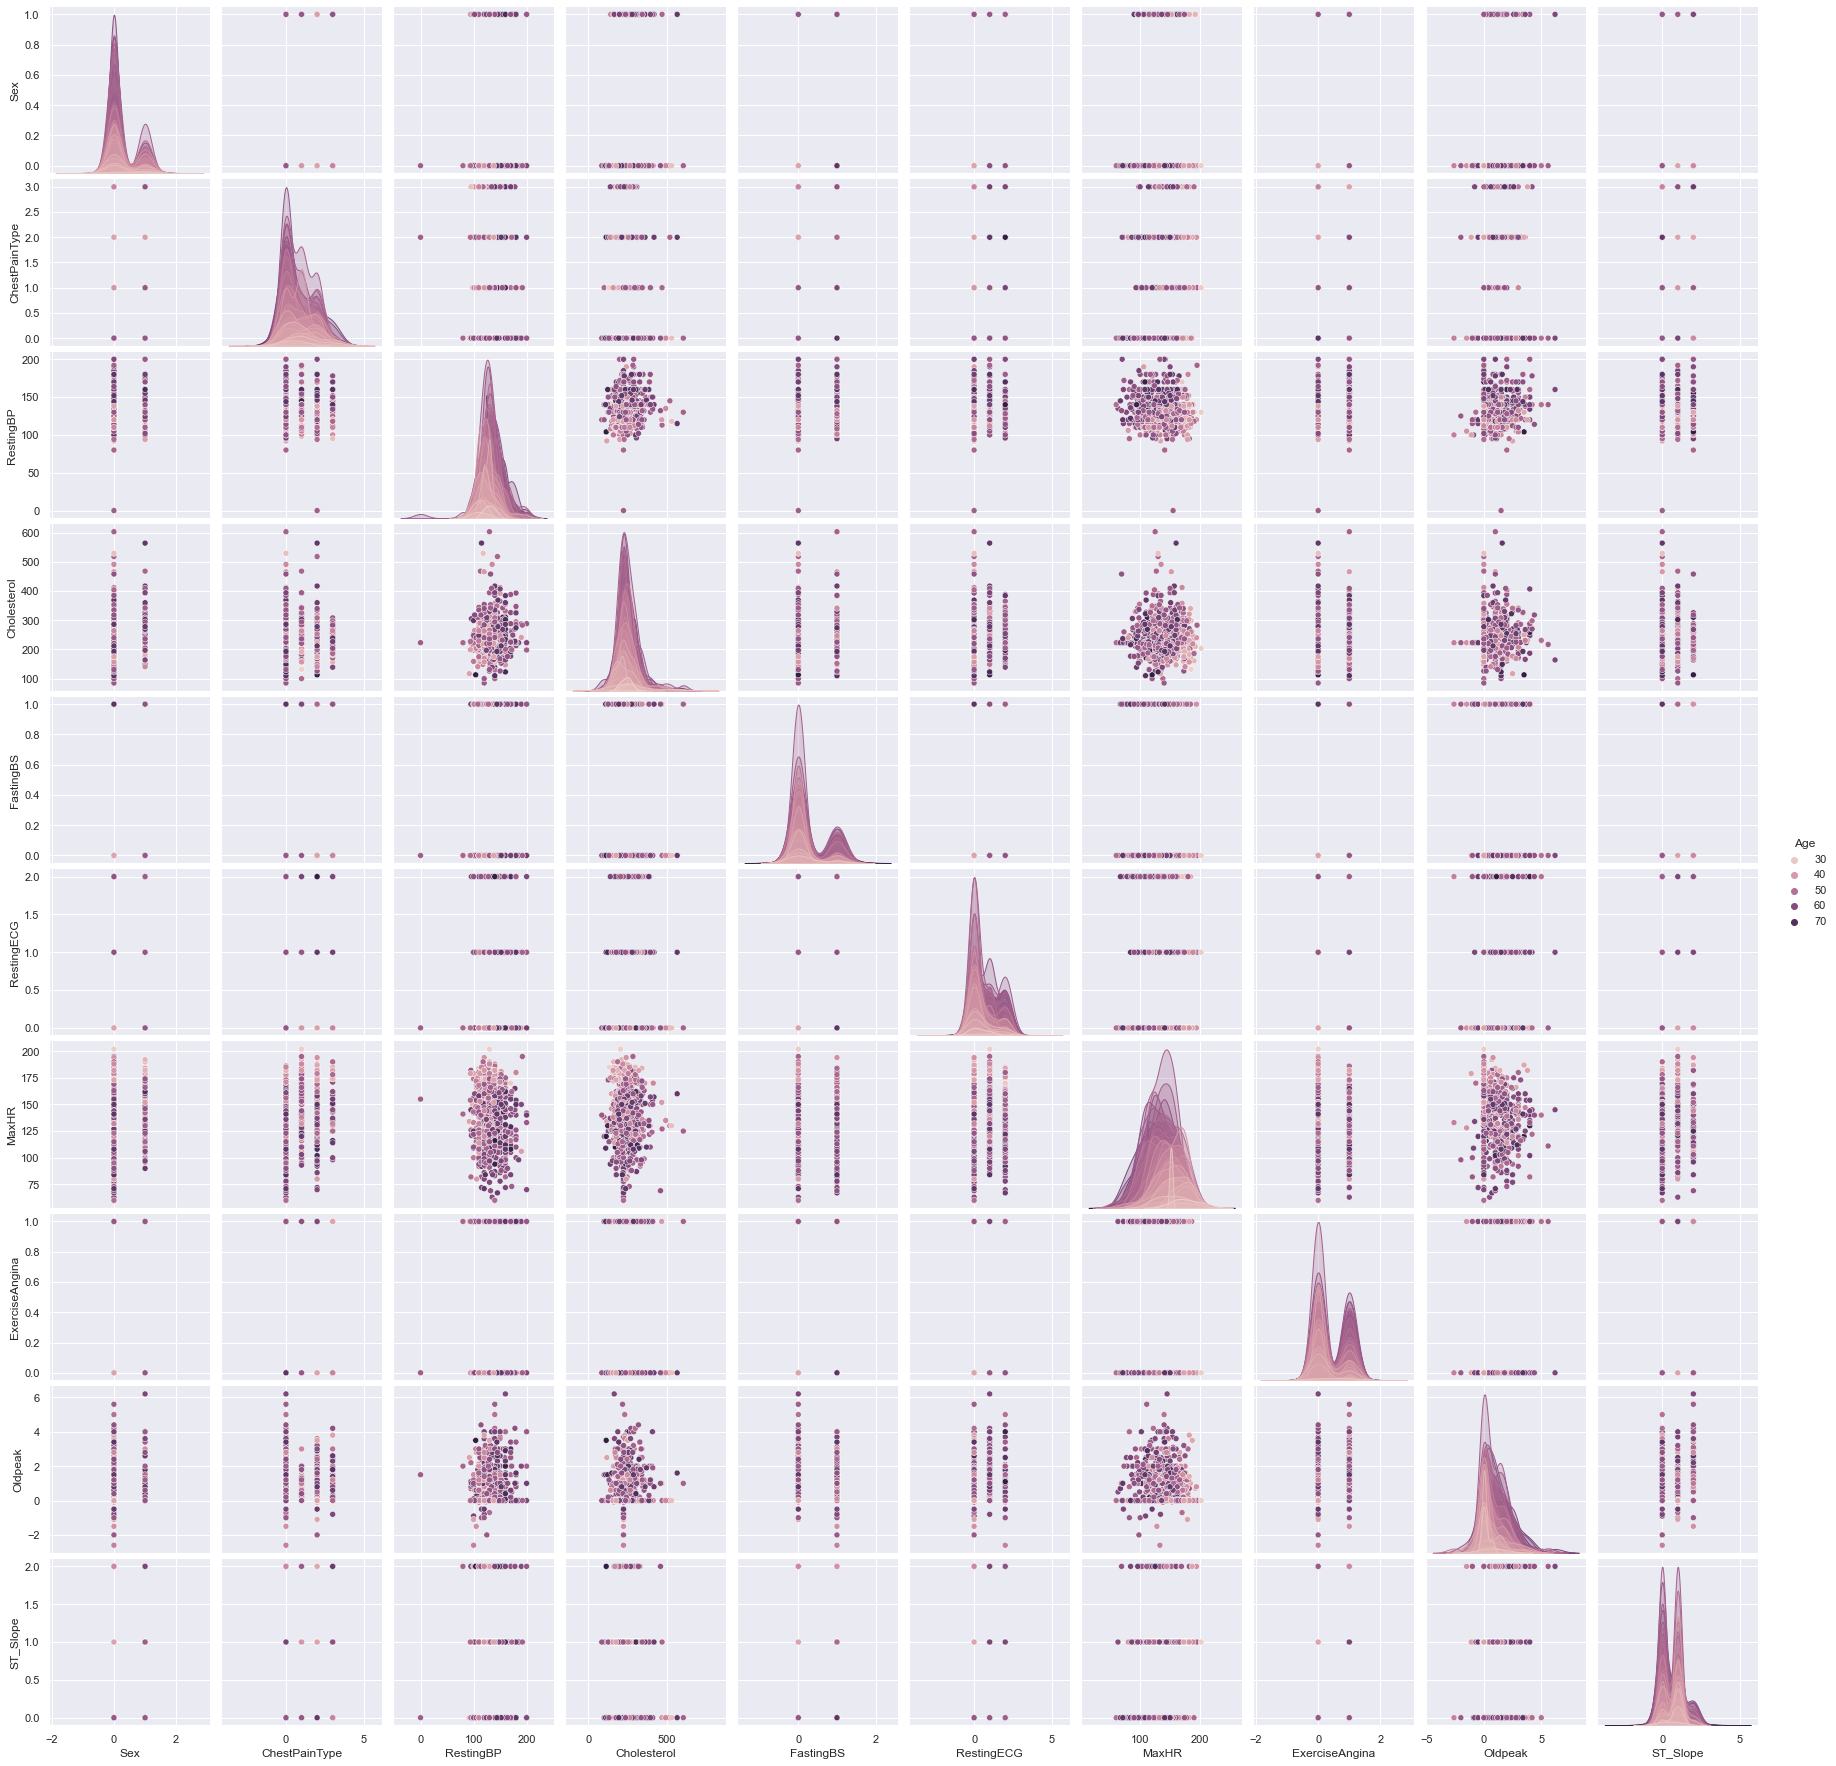

In [12]:
sns.pairplot(df[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak',
'ST_Slope']], hue="Age")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of heart failures between males and females.')

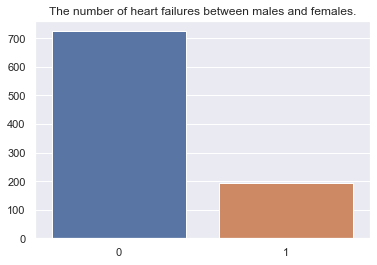

In [13]:
heartdisease_count_by_sex = df.groupby("Sex").HeartDisease.count().to_dict()
sns.barplot(list(heartdisease_count_by_sex.keys()), list(heartdisease_count_by_sex.values()))
plt.title("The number of heart failures between males and females.")

Splitting data into test and train sets

In [14]:
training_data, testing_data = train_test_split(df, test_size=0.25, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

No. of training examples: 688
No. of testing examples: 230


In [15]:
y = training_data['HeartDisease']
x1 = training_data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]

## Logistic Regression

Regression for training data set

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.369770
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  688
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.4598
Time:                        02:29:17   Log-Likelihood:                -254.40
converged:                       True   LL-Null:                       -470.98
Covariance Type:            nonrobust   LLR p-value:                 5.508e-86
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8084      1.363      0.593      0.553      -1.862       3.479
Age                0.0254      0.014      1.857      0.063      -0.001       0.052
Sex               -1.5880      0.314     -5.058      0.000      -2.203      -0.973
ChestPainType     -0.7212      0.121     -5.953      0.000      -0.959      -0.484
RestingBP         -0.0068      0.006     -1.070      0.285      -0.019       0.006
Cholesterol        0.0033      0.002      1.538      0.124      -0.001       0.008
FastingBS          1.7167      0.300      5.713      0.000       1.128       2.306
RestingECG         0.1519      0.148      1.030      0.303      -0.137       0.441
MaxHR             -0.0098      0.005     -1.948      0.051      -0.020    6.14e-05
ExerciseAngina     0.9893      0.259      3.825      0.000       0.482       1.496
Oldpeak            0.7582      0.121      6.246      0.000       0.520       0.996
ST_Slope          -1.5512      0.187     -8.296      0.000      -1.918      -1.185
==================================================================================
"""

In [17]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.46, 0.51, 0.54, 0.70, 0.93, 0.23, 1.00, 0.21, 0.07, 0.05, 0.87,
       0.98, 0.95, 0.80, 0.00, 0.09, 0.34, 0.94, 0.58, 0.64, 0.52, 0.95,
       0.66, 0.07, 0.79, 0.61, 0.93, 0.10, 0.02, 1.00, 0.02, 0.43, 0.10,
       0.78, 0.94, 0.59, 0.75, 0.24, 0.06, 0.40, 0.05, 0.85, 0.14, 0.89,
       0.99, 0.96, 0.11, 0.84, 0.95, 0.98, 0.80, 0.99, 0.12, 0.98, 0.97,
       0.94, 0.24, 0.49, 0.99, 0.90, 0.99, 0.97, 0.25, 0.87, 0.64, 0.09,
       0.96, 0.69, 0.99, 0.25, 0.13, 0.85, 1.00, 0.24, 0.95, 0.14, 0.15,
       0.99, 0.70, 0.11, 0.95, 0.16, 0.99, 0.97, 0.93, 0.98, 0.98, 0.01,
       0.88, 0.98, 0.89, 0.85, 0.01, 0.08, 0.05, 0.02, 0.50, 0.26, 0.98,
       0.76, 0.08, 0.39, 0.02, 0.32, 0.24, 0.04, 0.05, 0.40, 0.62, 0.39,
       0.03, 0.89, 0.69, 0.78, 0.86, 0.73, 0.99, 0.94, 1.00, 0.81, 0.12,
       0.97, 0.94, 0.75, 0.89, 0.11, 0.98, 0.98, 0.68, 0.98, 0.99, 0.97,
       0.75, 0.75, 0.07, 0.71, 0.69, 0.92, 0.79, 0.06, 0.12, 0.98, 0.59,
       0.94, 0.99, 0.76, 0.81, 0.51, 0.08, 0.22, 0.

In [18]:
np.array(training_data['HeartDisease'])

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [19]:
results_log.pred_table()

array([[248.00, 51.00],
       [48.00, 341.00]])

In [20]:
# Confusion matrix for training data set
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,248.0,51.0
Actual 1,48.0,341.0


In [21]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8561046511627907

Regression for test data set

In [22]:
test_actual = testing_data['HeartDisease']
test_data = testing_data.drop(['HeartDisease'],axis=1)
test_data = sm.add_constant(test_data)
#test_data = test_data[x.columns.values]
test_data

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
803,1.0,62,1,0,140,394,0,1,157,0,1.2,0
219,1.0,29,0,1,140,263,0,0,170,0,0.0,1
696,1.0,35,0,0,120,198,0,0,130,1,1.6,0
234,1.0,54,1,1,140,309,0,2,140,0,0.0,1
531,1.0,64,0,0,143,306,1,2,115,1,1.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
718,1.0,57,0,0,165,289,1,1,124,0,1.0,0
413,1.0,56,0,2,125,223,1,0,98,0,-2.0,0
113,1.0,38,0,1,140,297,0,0,150,0,0.0,1
71,1.0,44,0,1,130,215,0,0,135,0,0.0,1


In [23]:
# Define function for confusion matrix
def confusion_matrix(data,actual_values,model):
    
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [24]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[92.00, 19.00],
        [18.00, 101.00]]),
 0.8391304347826087)

In [25]:
# Converting confusion matrix to Pandas DataFrame
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,92.0,19.0
Actual 1,18.0,101.0


In [26]:
# Misclassification rate
print ('Misclassification rate: '+str((18+17)/230))

Misclassification rate: 0.15217391304347827
